In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
engine.execute('select max(date) from measurement').fetchall()

[('2017-08-23',)]

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
year_data = session.query(measurement.date, measurement.prcp).\
filter(measurement.date > '2016-08-23').order_by(measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
year_df = pd.DataFrame(year_data,columns=['date','precipitation'])


# Sort the dataframe by date
year_df = year_df.set_index('date')

year_df



,precipitation
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


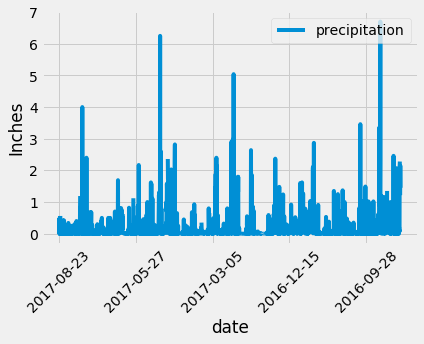

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data
year_df.plot()
plt.xticks(rotation = 45)
plt.legend(loc='upper right')
plt.ylabel('Inches')
plt.show()

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.id).count() 
station_count

9

In [42]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = 'USC00519281'
session.query(func.min(measurement.tobs),
             func.max(measurement.tobs),
             func.avg(measurement.tobs)).filter(measurement.station == station_id).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temp')

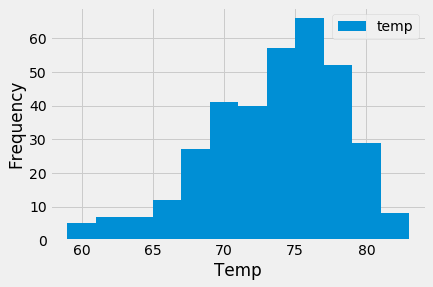

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_year_data = session.query(measurement.date, measurement.tobs).\
filter(measurement.date > '2016-08-23',measurement.station == 'USC00519281').order_by(measurement.date.desc()).all()

station_year_df = pd.DataFrame(station_year_data,columns=['date','temp'])
station_year_df = station_year_df.set_index('date')
station_year_df

station_year_df.plot(kind='hist', bins=12)
plt.xlabel('Temp')


# Close session

In [54]:
# Close Session
session.close()